<font color=Navy><b>SentimentAnalysis using Simple RNN <br>
This example illustrates the sentiment analysis on MovieReview Comments.


Import numpy and Pandas

In [2]:
import numpy as np 
import nltk
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [20]:
from sentence_transformers import SentenceTransformer

In [38]:
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

In [22]:
df = pd.read_csv('32K_labeled_data_points_for_sentiment_analysis.csv')

<AxesSubplot:xlabel='sentiment_label', ylabel='count'>

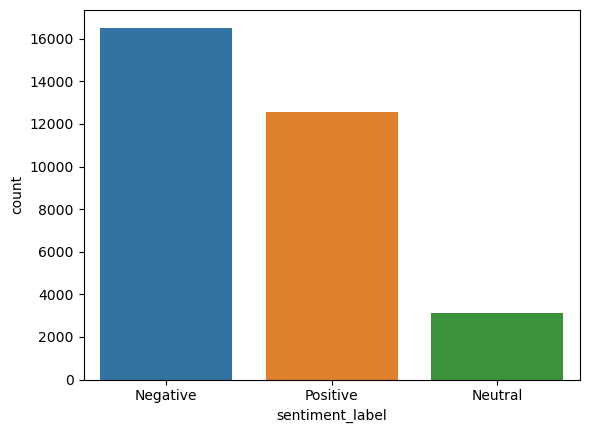

In [23]:
import seaborn as sns
sns.countplot(x ='sentiment_label', data = df)

In [24]:
df['sentiment_label'].value_counts()

Negative    16524
Positive    12556
Neutral      3142
Name: sentiment_label, dtype: int64

In [25]:
import nltk, re

<font color=Navy><b>The below function is used to preprocess the train and test data.<br>
1.fillna(0) -fills NaN values (if any )with zero<br>
2.Regular expression is used to match only the text data from the phrase<br>
3. The text is the split to get the sentence.<br>
4. every sentence is appended to Corpus for next use<br>

Note: Stemming or leematization or stop wordremoval is not applied here. Practioners can consider doing it for better result

In [26]:
from nltk.corpus import stopwords

In [27]:
from numpy import random
ix = list(range(df.shape[0]))
ix = random.permutation(ix)

In [28]:
div = int(df.shape[0] * 0.7)

In [33]:
%%time
train_df = df.iloc[ix[0:div]]
corpus_train = train_df[['text']]

CPU times: user 9.49 ms, sys: 0 ns, total: 9.49 ms
Wall time: 8.09 ms


In [34]:
%%time
test_df = df.iloc[ix[div:]]
corpus_test = test_df[['text']]

CPU times: user 7.46 ms, sys: 0 ns, total: 7.46 ms
Wall time: 7.4 ms


In [39]:
def get_embedding(input_sentence):
    return sbert_model.encode([input_sentence])[0]

In [40]:
%%time
X_train = corpus_train['text'].apply(get_embedding)

CPU times: user 1h 13min 29s, sys: 13.8 s, total: 1h 13min 43s
Wall time: 36min 54s


In [42]:
X_test = corpus_test['text'].apply(get_embedding)

In [43]:
from tensorflow import keras

In [61]:
X_train = X_train.values
X_test = X_test.values

In [106]:
X_train

[0.14305316,
 -0.56686455,
 0.3162612,
 0.151076,
 -0.305619,
 -0.21057744,
 -0.40801382,
 -0.21875763,
 0.562139,
 -0.124163084,
 0.09492498,
 -0.2591515,
 0.08162443,
 0.34693426,
 0.2704407,
 -0.1799021,
 -0.33059177,
 -0.022929464,
 -0.64513904,
 -0.3328484,
 -0.07998772,
 0.82894176,
 -0.34107575,
 -0.029687844,
 0.6522013,
 -0.30230644,
 0.38065872,
 -0.049806423,
 -0.33793098,
 -0.05255945,
 0.06308197,
 -0.02622859,
 -0.34258515,
 0.08544464,
 -0.1645565,
 0.15548782,
 -0.14832081,
 -0.1035177,
 -0.5592221,
 0.32973835,
 0.22989078,
 0.0017155608,
 -0.51948655,
 -0.72074354,
 -0.27067435,
 -0.17635769,
 0.085031256,
 0.02388751,
 -0.0713899,
 0.17332621,
 0.20927931,
 -0.39815426,
 0.031877384,
 0.09640114,
 -0.34950614,
 0.1511764,
 -0.7795717,
 -0.30560377,
 0.105550244,
 -0.164647,
 -0.18918385,
 0.06937125,
 -0.036699917,
 -0.2977711,
 0.28662464,
 0.10899317,
 0.40601346,
 0.27424276,
 0.26234698,
 0.07038822,
 0.45241854,
 -0.080305815,
 -0.42904097,
 0.46515435,
 0.31626

In [64]:
X_train[0].shape

(768,)

<font color=Navy><b>In order to train the RNN on the tokenized data, all text input  must have the same length.<br>
We will limit the maximum review length to maxlen=30 by truncating longer reviews and padding shorter reviews with a null value (0).<br>
Keras pad_sequences() function is used to accomplish this .<br>


In [74]:
maxlen = 768
X_train_padded = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=maxlen, padding='post')
X_test_padded = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=maxlen, padding='post')


In [75]:
X_train_padded

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

<font color=Navy><b>extract the label from the train data

In [76]:
y_train = train_df.iloc[:,-1].values

In [77]:
y_train 

array(['Negative', 'Positive', 'Negative', ..., 'Negative', 'Positive',
       'Positive'], dtype=object)

<font color=Navy><b>Encode the label using one hot encoder

In [78]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1))

In [79]:
encoder.categories_

[array(['Negative', 'Neutral', 'Positive'], dtype=object)]

In [80]:
y_train

array(['Negative', 'Positive', 'Negative', ..., 'Negative', 'Positive',
       'Positive'], dtype=object)

In [81]:
y_train_encoded

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [104]:
X_test_new = [x[0][0] for x in X_test]
print(X_train.shape)
print(X_train_padded.shape)
print(y_train_encoded.shape)
print(X_test_padded.shape)

IndexError: invalid index to scalar variable.

In [99]:
len(X_train[0][0])

768

# <font color=Navy>Design an Bidirectional LSTM model for sentiment analysis

<font color=Navy>the below code demonstrates the architecture of RNN built.<br>
input is a sequence of words i.e,, integer word IDs of maximum length = 30<br>
output is a  sentiment label (0, 1,2,3,4).


In [87]:
#import the Keras layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Dense, Dropout, LSTM, Dropout,Bidirectional

vocabulary_size = 768 # len(word_to_index_train) + 1
embedding_size=30

model = Sequential()
model.add(Embedding(vocabulary_size, embedding_size, trainable=True))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))
model.summary()

2022-09-16 18:49:36.202605: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 30)          23040     
                                                                 
 bidirectional (Bidirectiona  (None, 128)              48640     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 3)                 387       
                                                                 
Total params: 72,067
Trainable params: 72,067
Non-trainable params: 0
_________________________________________________________________


719,227 parameters in total need to be trained.

<font color=>Train and evaluate our model
We first need to compile our model by specifying the loss function and optimizer we want to use while training, as well as any evaluation metrics we’d like to measure.<br>
Specify the appropriate parameters, including at least one metric ‘accuracy’.

In [88]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [89]:
model.fit(X_train_padded, y_train_encoded, batch_size=256, epochs=5 )

Epoch 1/5


InvalidArgumentError: Graph execution error:

Detected at node 'sequential/embedding/embedding_lookup' defined at (most recent call last):
    File "/home/ashish/anaconda3/envs/stock_market_prediction/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/home/ashish/anaconda3/envs/stock_market_prediction/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/home/ashish/anaconda3/envs/stock_market_prediction/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/ashish/anaconda3/envs/stock_market_prediction/lib/python3.10/site-packages/traitlets/config/application.py", line 976, in launch_instance
      app.start()
    File "/home/ashish/anaconda3/envs/stock_market_prediction/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/home/ashish/anaconda3/envs/stock_market_prediction/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/home/ashish/anaconda3/envs/stock_market_prediction/lib/python3.10/asyncio/base_events.py", line 600, in run_forever
      self._run_once()
    File "/home/ashish/anaconda3/envs/stock_market_prediction/lib/python3.10/asyncio/base_events.py", line 1896, in _run_once
      handle._run()
    File "/home/ashish/anaconda3/envs/stock_market_prediction/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/ashish/anaconda3/envs/stock_market_prediction/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/home/ashish/anaconda3/envs/stock_market_prediction/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/home/ashish/anaconda3/envs/stock_market_prediction/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/home/ashish/anaconda3/envs/stock_market_prediction/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/home/ashish/anaconda3/envs/stock_market_prediction/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/home/ashish/anaconda3/envs/stock_market_prediction/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/ashish/anaconda3/envs/stock_market_prediction/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2881, in run_cell
      result = self._run_cell(
    File "/home/ashish/anaconda3/envs/stock_market_prediction/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2936, in _run_cell
      return runner(coro)
    File "/home/ashish/anaconda3/envs/stock_market_prediction/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/ashish/anaconda3/envs/stock_market_prediction/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3135, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/ashish/anaconda3/envs/stock_market_prediction/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3338, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/ashish/anaconda3/envs/stock_market_prediction/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_15208/4047151295.py", line 1, in <cell line: 1>
      model.fit(X_train_padded, y_train_encoded, batch_size=256, epochs=5 )
    File "/home/ashish/anaconda3/envs/stock_market_prediction/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/ashish/anaconda3/envs/stock_market_prediction/lib/python3.10/site-packages/keras/engine/training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/ashish/anaconda3/envs/stock_market_prediction/lib/python3.10/site-packages/keras/engine/training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "/home/ashish/anaconda3/envs/stock_market_prediction/lib/python3.10/site-packages/keras/engine/training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/ashish/anaconda3/envs/stock_market_prediction/lib/python3.10/site-packages/keras/engine/training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "/home/ashish/anaconda3/envs/stock_market_prediction/lib/python3.10/site-packages/keras/engine/training.py", line 889, in train_step
      y_pred = self(x, training=True)
    File "/home/ashish/anaconda3/envs/stock_market_prediction/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/ashish/anaconda3/envs/stock_market_prediction/lib/python3.10/site-packages/keras/engine/training.py", line 490, in __call__
      return super().__call__(*args, **kwargs)
    File "/home/ashish/anaconda3/envs/stock_market_prediction/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/ashish/anaconda3/envs/stock_market_prediction/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/ashish/anaconda3/envs/stock_market_prediction/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/home/ashish/anaconda3/envs/stock_market_prediction/lib/python3.10/site-packages/keras/engine/sequential.py", line 374, in call
      return super(Sequential, self).call(inputs, training=training, mask=mask)
    File "/home/ashish/anaconda3/envs/stock_market_prediction/lib/python3.10/site-packages/keras/engine/functional.py", line 458, in call
      return self._run_internal_graph(
    File "/home/ashish/anaconda3/envs/stock_market_prediction/lib/python3.10/site-packages/keras/engine/functional.py", line 596, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/home/ashish/anaconda3/envs/stock_market_prediction/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/ashish/anaconda3/envs/stock_market_prediction/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/ashish/anaconda3/envs/stock_market_prediction/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/home/ashish/anaconda3/envs/stock_market_prediction/lib/python3.10/site-packages/keras/layers/core/embedding.py", line 199, in call
      out = tf.nn.embedding_lookup(self.embeddings, inputs)
Node: 'sequential/embedding/embedding_lookup'
indices[240,57] = -1 is not in [0, 768)
	 [[{{node sequential/embedding/embedding_lookup}}]] [Op:__inference_train_function_5632]

In [37]:
pred = model.predict(X_test_padded)

303/303 [==============================] - 4s 9ms/step


In [38]:
labels = ['Negative', 'Neutral', 'Positive']
LABELS=[labels[i] for i in model.predict(X_test_padded).argmax(axis=-1)]

303/303 [==============================] - 3s 9ms/step


In [39]:
#predicted = pd.DataFrame({'Phrase': test_df.iloc[:,0].values, 'Sentiment': LABELS})
predicted = pd.DataFrame({'text': test_df['text'].values, 'sentiment_label': LABELS})

In [40]:
predicted

,text,sentiment_label
0,Earns its laughs from stock redneck 'types' an...,Positive
1,RT @hamilt0n: I hope someone asks the candidat...,Negative
2,RT @goldietaylor: Huckabee. #GOPDebates http:/...,Negative
3,http://url_removed - all of you Iowans need to...,Negative
4,As surreal as a dream and as detailed as a pho...,Positive
...,...,...
9662,"Everything's serious, poetic, earnest and s...",Negative
9663,"Too slow, too long and too little happens.",Positive
9664,I believe Silberling had the best intentions h...,Positive
9665,RT @anonymous thanks #OLTL for all the Cord/Ti...,Negative


In [41]:
print(classification_report(test_df['sentiment_label'], y_pred = predicted['sentiment_label'], labels = labels))

              precision    recall  f1-score   support

    Negative       0.53      0.68      0.60      5030
     Neutral       0.21      0.04      0.06       924
    Positive       0.43      0.35      0.39      3713

    accuracy                           0.49      9667
   macro avg       0.39      0.36      0.35      9667
weighted avg       0.46      0.49      0.47      9667

